<a href="https://colab.research.google.com/github/debbiedebdeb/Algorithm/blob/master/Kaggle%20Data%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EA%B3%B5%EB%B6%80/%20%ED%95%84%EC%82%AC%20/%20%5B%ED%95%84%EC%82%AC%5DFactors_Affecting_Success_in_School_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KAGGLE Grand Master DATAI 님의 코드를 필사했습니다. 
___

# 소개글
    In this kernel, I am interested with the effect of the raising hands, visiting resources and viewing announcements.
    Then found two of students have low level grade although they have higher values of raising hands, visiting resources and viewing announcements and start researching it why !!!

# 패키지 & 라이브러리 

In [ ]:
import numpy as np #linear algebra 
import pandas as pd #data processing, csv filt I/O 
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style = 'ticks')

import os

In [ ]:
# kaggle id
os.environ['KAGGLE_USERNAME'] = 'debbiekim'
os.environ['KAGGLE_KEY'] = 'a8238eddcf1957422ed574f5bf5cdf5c'

# data download 
!!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


# 평균치 이상인데 LOW받은 애들 이유 찾기

In [ ]:
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# feature names 
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [ ]:
melt = pd.melt(df, id_vars = 'Class', value_vars = ['raisedhands',
       'VisITedResources', 'AnnouncementsView'])
melt

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1435,L,AnnouncementsView,5
1436,M,AnnouncementsView,14
1437,M,AnnouncementsView,25
1438,L,AnnouncementsView,14


* MELT 를 왜 한걸까? 

___

* As it can be seen in swarm plot students who have higher values of raising hands, visiting resources and viewing announcements take high level values mostly.
* However there are some students who take low level although they have higher values of raising hands, visiting resources and viewing announcements

Text(0.5, 1.0, 'High, Middile, and Low level students')

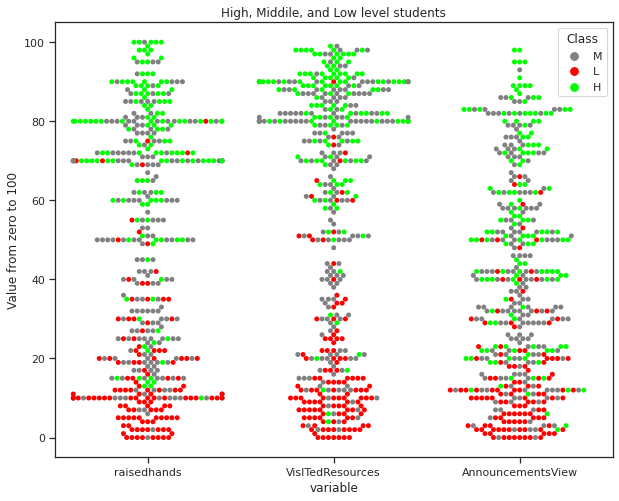

In [ ]:
plt.subplots(figsize = (10,8))
sns.swarmplot(x = 'variable', y = 'value', hue = 'Class', data = melt, 
              palette = {'H' : 'lime', 'M' : 'grey', 'L' : 'red'})
plt.ylabel('Value from zero to 100')
plt.title('High, Middile, and Low level students')

Well, let's look at why these have low level grade 

In [ ]:
# 각 수치의 평균값 구하기 
ave_raisehands = sum(df['raisedhands'])/len(df['raisedhands'])
ave_visitedresources = sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_announcementview = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])

# 평균값 이상임에도 불구하고 L받은 애들 
unsuccess = df.loc[(df['raisedhands'] >=ave_raisehands) & (df['VisITedResources'] >=ave_visitedresources) & 
                   (df['AnnouncementsView']>= ave_announcementview) & (df['Class'] == 'L')]

In [ ]:
# All features of these two student 
print(unsuccess)

    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
444      M      Jordan       Jordan  MiddleSchool    G-08         A   
445      M      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
444  Chemistry        F      Mum           75                72   
445  Chemistry        S      Mum           72                76   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
444                 64          39                   Yes   
445                 66          40                   Yes   

    ParentschoolSatisfaction StudentAbsenceDays Class  
444                     Good            Above-7     L  
445                     Good            Above-7     L  


In [ ]:
df['numeric_class'] = [ 1 if df.loc[i,'Class'] == 'L' else 2  if df.loc[i,'Class'] == 'M' else 3 for i in range(len(df)) ]

In [ ]:
# Then start with gender : These two are boy so they can be low level due to it :) Girls say Yes but let's look
grade_male_ave = sum(df[df.gender == 'M'].numeric_class) / float(len(df[df.gender == 'M']))

grade_female_ave = sum(df[df.gender =='F'].numeric_class) / float(len(df[df.gender =='F']))

In [ ]:
print(grade_male_ave)
print(grade_female_ave)

1.881967213114754
2.2914285714285714


* Average of female is higher than average of male. Therefore two only reason taking low grade can by being male. Girls are more intelligent than boys. 
* Gender comparison cannot completely explain why these two students takes low level grades. 

Jordan average : 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

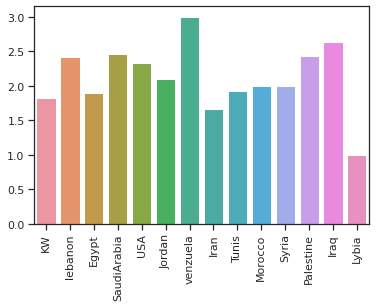

In [ ]:
# now lets look at nationality 
nation = df.NationalITy.unique()
nation_grade_ave = [
    sum(df[df.NationalITy == i].numeric_class) / float(len(df[df.NationalITy == i])) for i in nation ]
ax = sns.barplot(x = nation, y = nation_grade_ave)

jordan_ave = sum(df[df.NationalITy =='Jordan'].numeric_class) / float(len(df[df.NationalITy =='Jordan']))
print('Jordan average : '+str(jordan_ave))
plt.xticks(rotation = 90)

* As it can be seen in bar plot Jordan is seventh country with average 2.09
* Not so bad. Jordan has positive impact on these two student actually 

Chemistry average :2.0833333333333335


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

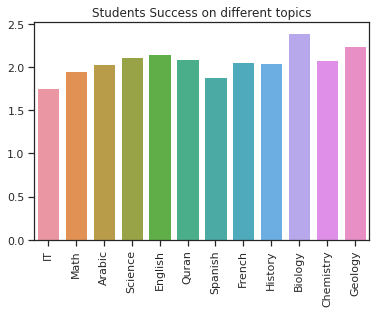

In [ ]:
# now lets look at topic : Chemistry 
lessons = df.Topic.unique()
lessons_grade_ave = [
    sum(df[df.Topic == i].numeric_class) / float(len(df[df.Topic == i ])) for i in lessons ] 
ax = sns.barplot(x = lessons, y = lessons_grade_ave)
plt.title('Students Success on different topics')
chemistry_ave = sum(df[df.Topic == 'Chemistry'].numeric_class) / float(len(df[df.Topic == 'Chemistry']))
print('Chemistry average :' + str(chemistry_ave))
plt.xticks(rotation = 90)

* Chemistry is not hardest lesson. Even it can be concluded that it is one of the easiest lessons with its 2.08 average
* Come on why these students take low level grades!!!

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

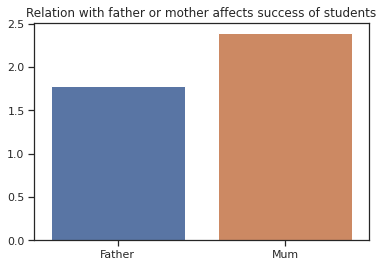

In [ ]:
# Lets look at relation with family members 
relation = df.Relation.unique()
relation_grade_ave = [
    sum( df[df.Relation ==i].numeric_class) / float(len(df[df.Relation == i])) for i in relation
]
ax = sns.barplot(x = relation, y = relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

* Having relation with mom has POSITIVE effect on these students
* Students who have relation with their mom is more successful 

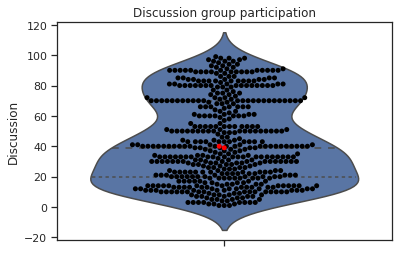

In [ ]:
# LEts look at how many times the student participate in discussion group 
discussion = df.Discussion
dis_ave = sum(discussion) / len(discussion)
ax = sns.violinplot(y = discussion, split = True, inner = 'quart')
ax = sns.swarmplot(y = discussion , color = 'black')
ax = sns.swarmplot(y = unsuccess.Discussion, color = 'red')
plt.title('Discussion group participation')
plt.savefig('graph.png')

In [ ]:
unsuccess.Discussion

444    39
445    40
Name: Discussion, dtype: int64

* These two students r under the avg of discussion
* Average is 43. Therefore participating discussion groups can be important success of these two students

Text(0.5, 1.0, 'Absence effect on success')

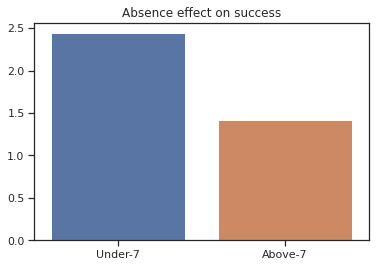

In [ ]:
# NOW Lastly lets look at 
absence_day = df.StudentAbsenceDays.unique()
ab_ave = [
    sum( df[df.StudentAbsenceDays == i].numeric_class)/ float( len( df[df.StudentAbsenceDays == i])) for i in absence_day
]
ax = sns.barplot(x = absence_day, y = ab_ave)
plt.title('Absence effect on success')

* Find one more reason why these have low level grade becuz their absence days are above seven. 

# Conclusion

* Positive and negative effects on success of these two students can be seen. 
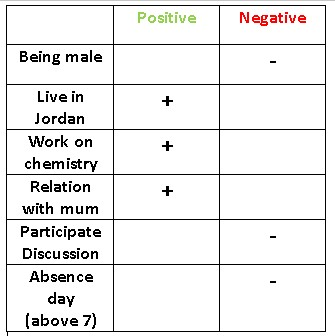